In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
import pickle

plt.rcParams['figure.figsize'] = (12.0, 9.0)
df1 = pd.read_csv('C:\\Users\\KIIT\\Downloads\\Finance_data.csv')
df1.describe()

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
print("Normal Data")
print(df_norm)

Normal Data
         age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
0   0.928571      0.000000            0.2    0.666667          0.333333   
1   0.142857      0.500000            0.4    0.166667          0.000000   
2   0.642857      0.333333            1.0    0.500000          0.166667   
3   0.071429      0.166667            0.0    0.333333          1.000000   
4   0.214286      0.166667            0.0    0.333333          0.833333   
5   0.214286      1.000000            0.8    0.500000          0.833333   
6   0.428571      0.333333            1.0    0.500000          0.166667   
7   0.000000      0.166667            0.4    1.000000          0.500000   
8   1.000000      0.166667            0.6    1.000000          0.666667   
9   0.714286      0.000000            0.4    1.000000          0.500000   
10  1.000000      0.166667            0.6    1.000000          0.666667   
11  0.571429      0.166667            0.8    1.000000          0.833333   
12  0.000000 

In [2]:
df_norm.isnull().sum()

age                 0
Mutual_Funds        0
Equity_Market       0
Debentures          0
Government_Bonds    0
Fixed_Deposits      0
PPF                 0
Gold                0
dtype: int64

[0.92857143 0.14285714 0.64285714 0.07142857 0.21428571 0.21428571
 0.42857143 0.         1.         0.71428571 1.         0.57142857
 0.         0.5        0.28571429 0.42857143 0.5        0.42857143
 0.57142857 0.35714286 0.57142857 0.21428571 0.42857143 0.28571429
 0.35714286 0.78571429 0.35714286 0.71428571 0.57142857 0.92857143
 0.42857143 0.71428571 0.42857143 0.35714286 0.42857143 0.64285714
 0.64285714 0.28571429 0.71428571 0.57142857]


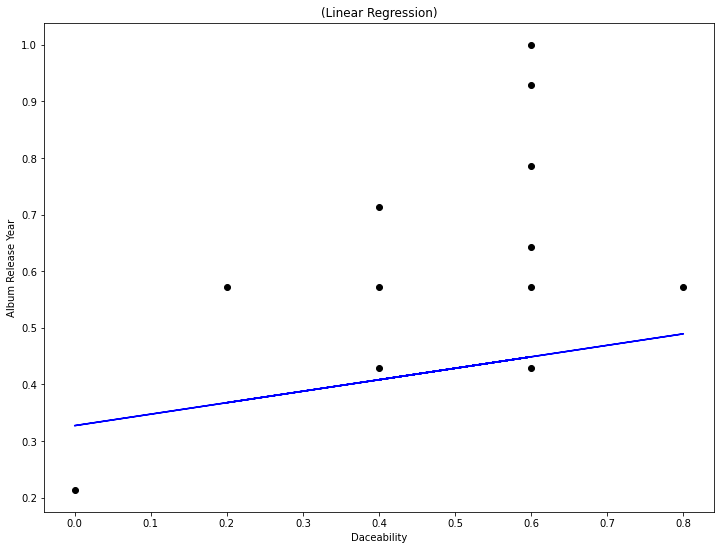

RMSE : 0.24150323424406295 R2_SCORE:  0.03590035818951487


NameError: name 'model' is not defined

In [3]:
X = df_norm.iloc[:, 2:3].values
Y = df_norm.iloc[:, 0].values 
print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

def linear():
    plt.scatter(X_test, Y_test, color='black')
    plt.plot(X_test, lin_reg.predict(X_test), color='blue')
    plt.title('(Linear Regression)')
    plt.xlabel('Daceability')
    plt.ylabel('Album Release Year')
    plt.show()
    return
linear()

y_train_predict = lin_reg.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2=r2_score(Y_train,y_train_predict)
print('RMSE :',rmse,'R2_SCORE: ',r2)
pickle.dump(lin_reg, open('model.pkl','wb'))
print(model.predict([[1]]))

In [ ]:
degree=4
poly_reg = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train)

def polymonial():
    plt.scatter(X_test, Y_test, color='black')
    plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue')
    plt.title('(Polynomial Regression)')
    plt.xlabel('Daceability')
    plt.ylabel('Album Release Year')
    plt.show()
    return
polymonial()

y_train_predict1 = pol_reg.predict(X_poly)
rmse1=(np.sqrt(mean_squared_error(Y_train,y_train_predict1)))
r2_1=r2_score(Y_train,y_train_predict1)
print('RMSE :',rmse1,'R2_SCORE: ',r2_1)

In [ ]:
X = df1.iloc[:, 0:1].values
print(X)
Y = df1.iloc[:, 1].values 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train.astype(int))

p_model = model.predict(X_test)
score = model.score(X_test, Y_test.astype(int))
cm = metrics.confusion_matrix(Y_test.astype(int), p_model)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

y_train_predict2 = model.predict(X_train)
rmse2=(np.sqrt(mean_squared_error(Y_train.astype(int),y_train_predict2)))
r2_2=r2_score(Y_train.astype(int),y_train_predict2)
print('RMSE :',rmse2,'R2_SCORE: ',r2_2)

In [ ]:
sns.pairplot(data=df_norm)

In [ ]:
def standard_scaling(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std
    
df_standardized = standard_scaling(df_norm)

corr = df_norm.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(176, 0, n=7),
    square=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    ha='center',
    rotation=45
);